<a href="https://colab.research.google.com/github/shubh199815/FastAI-DL-1/blob/master/CIFAR10_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [0]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

Training Data:  (50000, 32, 32, 3) (50000, 1)
Testing Data:  (10000, 32, 32, 3) (10000, 1)
Total no of outputs:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth: [3]')

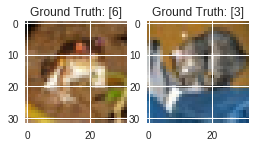

In [9]:
print('Training Data: ', train_images.shape, train_labels.shape)
print('Testing Data: ', test_images.shape, test_labels.shape)

classes = np.unique(train_labels)
nclasses = len(classes)
print('Total no of outputs: ', nclasses)
print('Classes: ', classes)

plt.figure(figsize=[4,2])

plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth: {}".format(train_labels[0]))

plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth: {}".format(test_labels[0]))

In [11]:
nRows, nCols, nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

print(train_data.shape)
print(test_data.shape)
print(train_images.shape[1:])

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(32, 32, 3)


In [0]:
train_data /= 255
test_data /= 255
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [15]:
print('Original label for 0: ', train_labels[0])
print('One-hot encoded label for 0: ', train_labels_one_hot[0])
input_shape = (nRows, nCols, nDims)

Original label for 0:  [6]
One-hot encoded label for 0:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
def createModel():
  model = Sequential()
  
  #the first 2 layers with 32 filters of size 3x3
  model.add(Conv2D(32,(3,3), padding='same', activation='relu', input_shape=input_shape))
  model.add(Conv2D(32,(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
  model.add(Conv2D(64,(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
  model.add(Conv2D(64,(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(512))
  model.add(Dense(nclasses, activation='softmax'))
  
  return model

In [0]:
learn= createModel()
bs = 256
epochs = 50
learn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

NameError: ignored

In [21]:
learn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [22]:
history = learn.fit(train_data, train_labels_one_hot, batch_size=bs, epochs=epochs, verbose=1, validation_data=(test_data, test_labels_one_hot))
learn.evaluate(test_data, test_labels_one_hot)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 305us/step - loss: 2.0533 - acc: 0.2490 - val_loss: 2.0044 - val_acc: 0.2935
Epoch 2/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.6771 - acc: 0.3938 - val_loss: 1.4817 - val_acc: 0.4644
Epoch 3/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.4882 - acc: 0.4604 - val_loss: 1.4772 - val_acc: 0.4842
Epoch 4/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.3490 - acc: 0.5182 - val_loss: 1.2980 - val_acc: 0.5307
Epoch 5/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.2518 - acc: 0.5513 - val_loss: 1.1767 - val_acc: 0.5771
Epoch 6/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.1600 - acc: 0.5886 - val_loss: 1.1198 - val_acc: 0.6110
Epoch 7/50
50000/50000 [==============================] - 10s 207us/

[0.6885915952682495, 0.7821]